<p style="font-family: Arial; font-size:3.5em;color:purple;"> XY Model </p>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
from XY_diagonalisation import Computations_XY_model as XY_model
from ipywidgets import interact_manual,interactive,FloatSlider
from IPython.display import clear_output
name=1
Data = np.load(f"Results/Fourier_{name}/Fourier.pkl",allow_pickle=True)

In [2]:
Data.shape

(50, 1000001, 2)

50 = num intentos
1000001 = tamaño de la cadena
2 = + / -

# Spectrum of the XY model

In [3]:
def Energy(Gamma,Lambda):
    XY_model.Gamma=Gamma
    XY_model.Lambda=Lambda
    plt.figure(figsize=(8,5))
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,XY_model.Omega(x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()

interactive_plot = interactive(Energy, Gamma=FloatSlider(value=0.5,min=0, max=1, step=0.005,continuous_update=False), Lambda=FloatSlider(value=0.5,min=0, max=1, step=0.01,continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Gamma', max=1.0, step=0.005…

Our Hamiltonian can be written as
$$H=\begin{pmatrix}
\lambda & \frac{1-\gamma}{2} & 0 &0 &\ldots  &0 &\frac{1+\gamma}{2}\\
\frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} & 0 &\ldots &0 &0\\
0 & \frac{1+\gamma}{2} & \lambda & \frac{1-\gamma}{2} &\ldots &0 &0\\
\vdots& \ddots & \ddots & \ddots & \ldots &  \vdots & \vdots\\
\frac{1-\gamma}{2}&0&0&0&\ldots & \frac{1+\gamma}{2} & \lambda
\end{pmatrix},$$

In [6]:
XY_model.Gamma=0.5
XY_model.Lambda=0.5

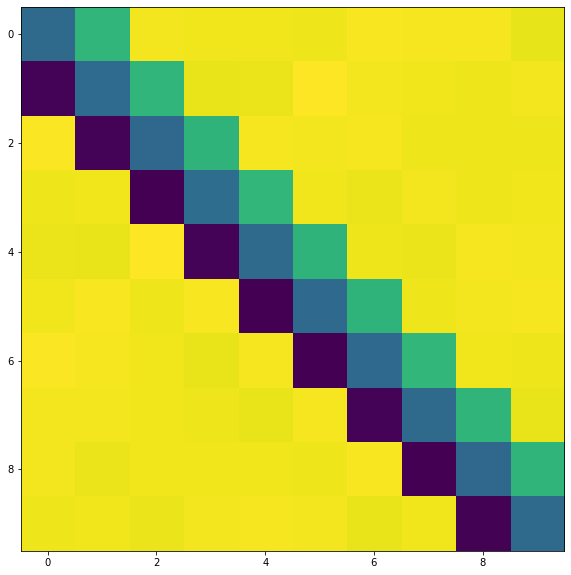

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[0,:,0],Fourier_plus=Data[0,:,1],L=10))

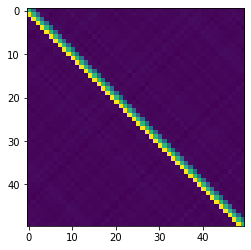

In [17]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50))

$$e^{-\beta H}$$

In [18]:
L=50
H=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            H[i,j] = XY_model.Lambda
        elif (i-j) % L == 1:
            H[i,j] = (1+XY_model.Gamma)*0.5
        elif (j-i) % L == 1:
            H[i,j] = (1-XY_model.Gamma)*0.5
H[0,L-1]=0
H[L-1,0]=0

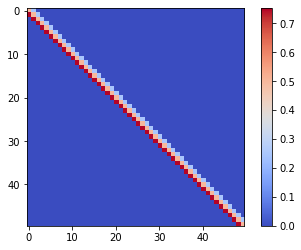

In [19]:
plt.imshow(H,cmap="coolwarm")
plt.colorbar()

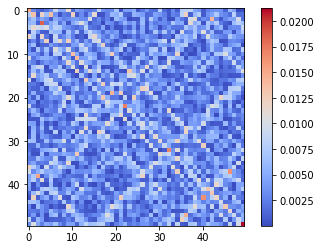

In [20]:
number=0
plt.imshow(np.abs(H-XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)),cmap="coolwarm")
plt.colorbar()

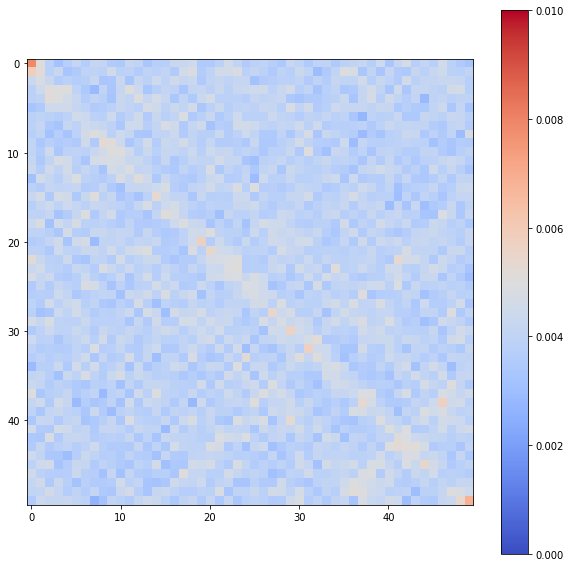

In [22]:
diff=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    diff+=np.abs(H-XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L))
    img=plt.imshow(diff/(number+1),cmap="coolwarm")
    img.set_clim(0,0.01)
    plt.colorbar()
    plt.show()
    clear_output(wait=True)
    

# Typicallity

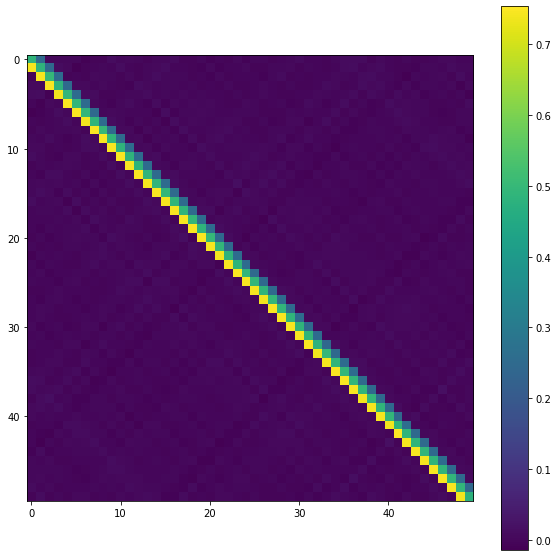

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=L))
plt.colorbar()

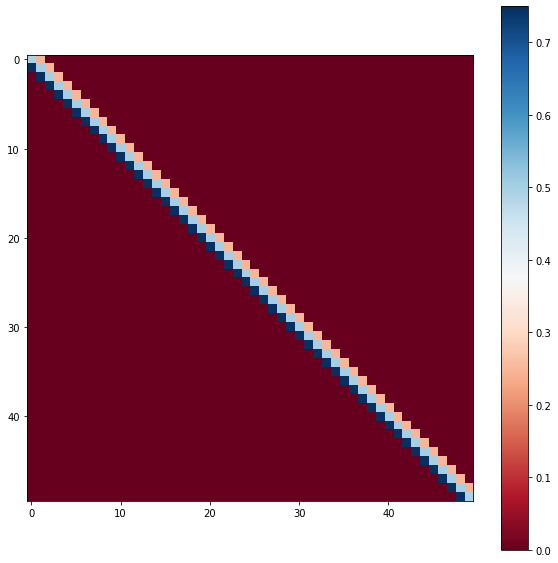

In [24]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    img=plt.imshow(avg/(number+1),cmap="RdBu")
    plt.colorbar()
    #img=plt.imshow(avg,norm=colors.SymLogNorm(linthresh=0.01, linscale=0.1, vmin=-0.01, vmax=0.77),cmap="RdBu")
    #cosa=plt.colorbar(img,extend='max',shrink=0.8)
    img.set_clim(0,0.75)
    
    plt.show()
    clear_output(wait=True)

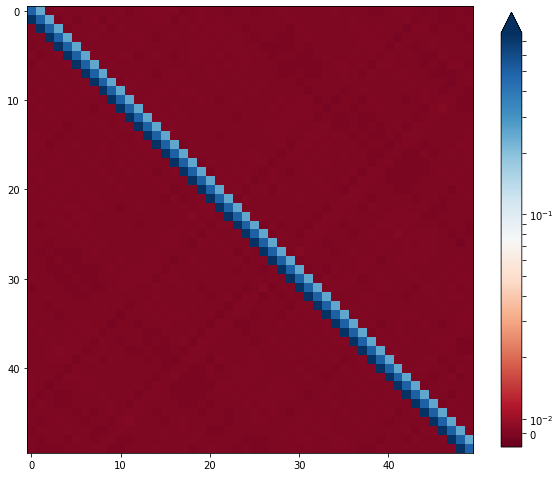

In [106]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(10,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    #img=plt.imshow(avg,cmap="RdBu")
    #plt.colorbar()
    img=plt.imshow(avg/(number+1),norm=colors.SymLogNorm(linthresh=0.01, linscale=0.1, vmin=-0.01, vmax=0.77),cmap="RdBu")
    cosa=plt.colorbar(img,extend='max',shrink=0.8)
    #img.set_clim(0,0.8)
    
    plt.show()
    clear_output(wait=True)

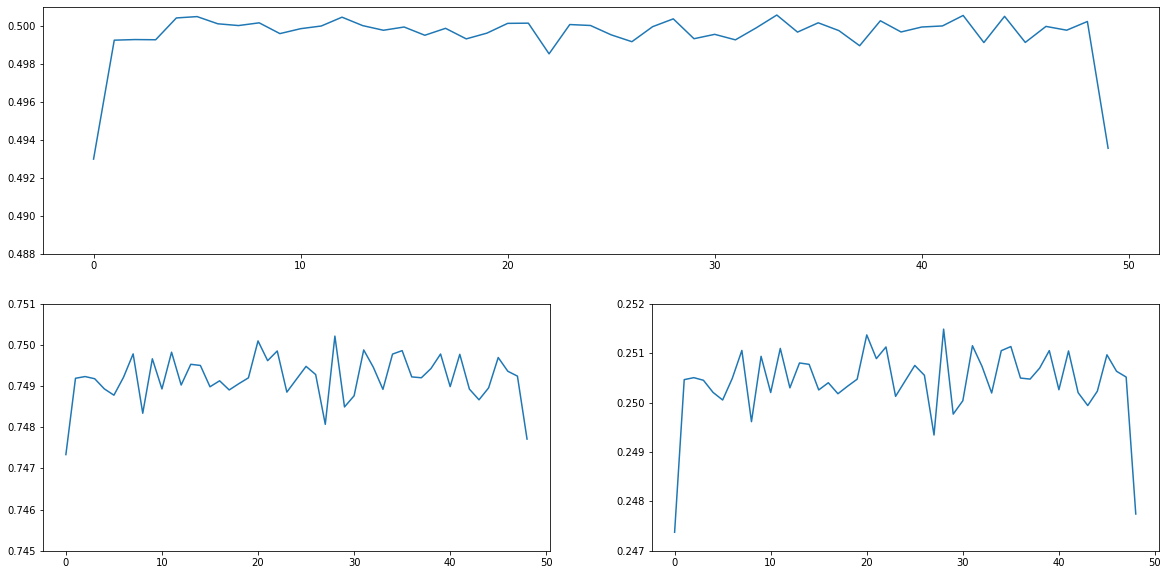

In [25]:
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(20,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    plt.subplot(2,1,1)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),0))
    plt.ylim(0.488,0.501)
    plt.subplot(2,2,3)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),1))
    plt.ylim(0.745,0.751)
    plt.subplot(2, 2, 4)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),-1))
    plt.ylim(0.247,0.252)
    plt.show()
    clear_output(wait=True)

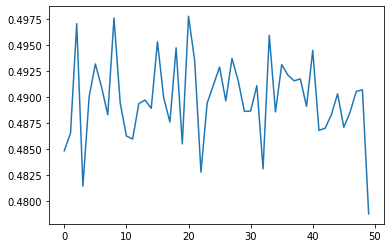

In [35]:
plt.plot(XY_model.get_band_of_matrix(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50),0))

$$\operatorname{Tr}_E\rho_1 \rho_2$$

In [20]:
XY_model.Gamma=0.7
XY_model.Lambda=0.3
XY_model.num_data=10
XY_model.N_size=10001

In [21]:
Data=XY_model.Fourier_Parallel_Transform()

In [ ]:
M_1 = XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[1,:,1],Fourier_minous=Data[1,:,1],L=XY_model.N_size)
M_2 = XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[0,:,1],Fourier_minous=Data[0,:,1],L=XY_model.N_size)

In [5]:
O_1,S,O_2 = np.linalg.svd(M_1,compute_uv=False)

In [10]:
O_12,S_2,O_22 = np.linalg.svd(M_2,compute_uv=False)

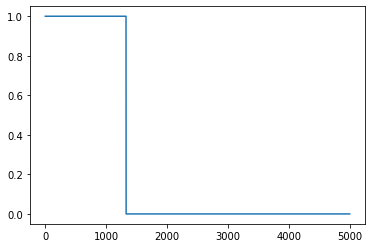

In [8]:
plt.plot(0.5-(S_2+S)/(S*S_2 +1))

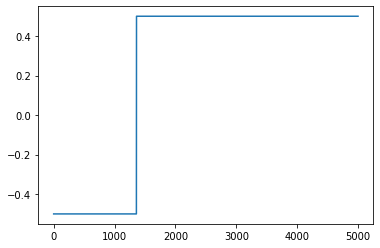

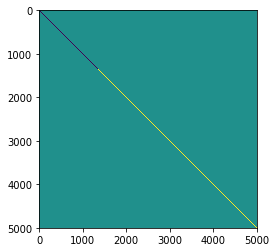

In [17]:
plt.imshow(np.diag(0.5-(S_2+S)/(S*S_2 +1)))

In [9]:
S

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.04583516e-18, 6.90223385e-19, 1.00255043e-19])

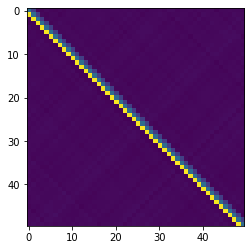

In [8]:
plt.imshow(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50))

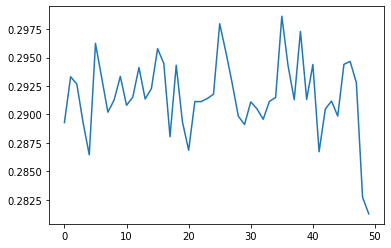

In [14]:
plt.plot(XY_model.get_band_of_matrix(XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=50),0))

In [12]:
(1+XY_model.Gamma)/2

0.85

In [13]:
(1-XY_model.Gamma)/2

0.15000000000000002

In [59]:
XY_model.beta

0.40824980415756823

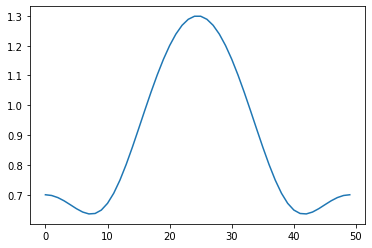

In [62]:
plt.plot(XY_model.Omega(np.linspace(-np.pi,np.pi)))

In [65]:
XY_model.beta

0.40824980415756823

In [64]:
np.min(XY_model.Omega(np.linspace(-np.pi,np.pi,int(1000))))

0.6352402402555565

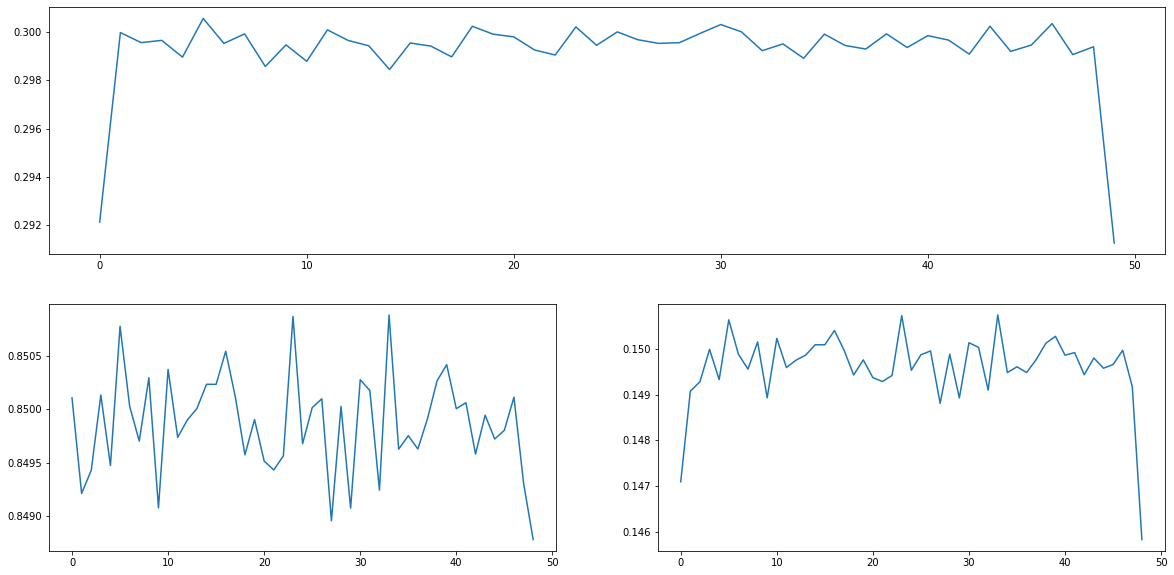

In [16]:
L=50
avg=np.zeros((L,L))
for number in range(L):
    plt.figure(figsize=(20,10))
    avg+=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=Data[number,:,0],Fourier_P=Data[number,:,1],L=L)
    plt.subplot(2,1,1)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),0))
    #plt.ylim(0.488,0.501)
    plt.subplot(2,2,3)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),1))
    #plt.ylim(0.745,0.751)
    plt.subplot(2, 2, 4)
    plt.plot(XY_model.get_band_of_matrix(avg/(number+1),-1))
    #plt.ylim(0.247,0.252)
    plt.show()
    clear_output(wait=True)

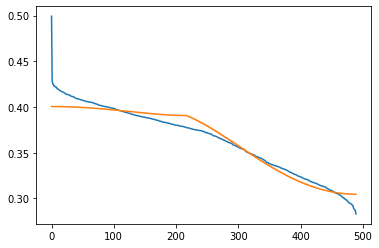

In [18]:
for i in range(10, 500,10):
    x,y=XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=i)
    plt.plot(x)
    plt.plot(y)
    plt.show()
    clear_output(wait=True)

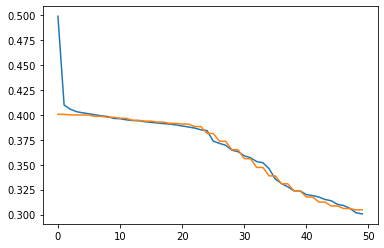

In [17]:
x,y=XY_model.Compute_Spectrum_Random_Distribution_Associated(Fourier_M=Data[1,:,0],Fourier_P=Data[1,:,1],L=50)
plt.plot(x)
plt.plot(y)
plt.show()

In [ ]:
XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[1,:,1],Fourier_minous=Data[1,:,1],L=XY_model.N_size)

In [79]:
M_1=XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[1,:,1],Fourier_minous=Data[1,:,1],L=50)
M_2=XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[0,:,1],Fourier_minous=Data[0,:,1],L=50)

In [80]:
O_11,S_1,O_21 = np.linalg.svd(M_1)
O_12,S_2,O_22 = np.linalg.svd(M_2)

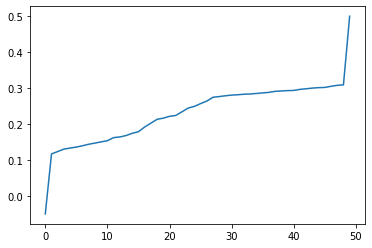

In [81]:
plt.plot(0.5-(S_1+S_2)/(S_1*S_2 + 1))

In [82]:
numbers = 1/(0.5-(S_1+S_2)/(S_1*S_2 + 1)) -1

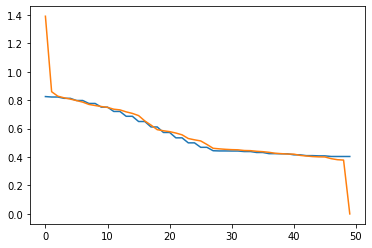

In [83]:
plt.plot(sorted(XY_model.Omega(np.arange(0,50)*2*np.pi/50)*XY_model.compute_beta(),reverse=True))
plt.plot(np.log(1/(0.5-S_1)-1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

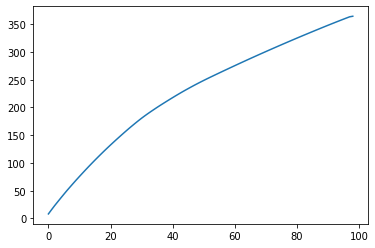

In [65]:
plt.plot(np.cumsum(numbers[1:]))

-S+1/2 = n 

# References
* [Ground state entanglement in quantum spin chains, Latorre et. al.](https://arxiv.org/pdf/quant-ph/0304098.pdf)

* [Calculation of reduced density matrices from correlation functions, Ingo Peschel](https://arxiv.org/pdf/cond-mat/0212631.pdf)

* [Pairing in fermionic systems: A quantum information perspective, Christina V. Kraus et. al.](https://arxiv.org/pdf/0810.4772.pdf)

* [On the Strong Subadditivity of the Renyi entropies for bosonic and fermionic Gaussian states, Giancarlo Camilo et. al.](https://arxiv.org/pdf/1810.07070.pdf)

* [ON CIRCULANT MATRICES, IRWIN KRA AND SANTIAGO R. SIMANCA](https://www.math.columbia.edu/~ums/pdf/cir-not5.pdf)

In [15]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
from XY_diagonalisation import Computations_XY_model as XY_model
from ipywidgets import interact_manual,interactive,FloatSlider
from IPython.display import clear_output

In [16]:
XY_model.Gamma=0.7
XY_model.Lambda=0.3
XY_model.num_data=10
XY_model.N_size=5001

In [17]:
Data=XY_model.Fourier_Parallel_Transform(Ground=True)

In [18]:
M_1 = XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[1,:,1],Fourier_minous=Data[1,:,1],L=XY_model.N_size)
M_2 = XY_model.Covariance_matrix_from_sub_sample(Fourier_plus=Data[0,:,1],Fourier_minous=Data[0,:,1],L=XY_model.N_size)

In [19]:
A_1,S_1,A_2 = np.linalg.svd(M_1)
B_1,S_2,B_2 = np.linalg.svd(M_2)

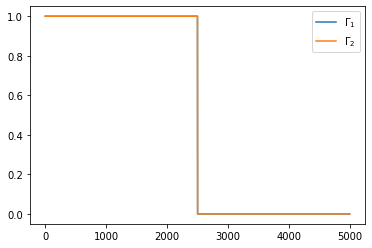

In [20]:
plt.plot(S_1,label=r"$\Gamma_1$")
plt.plot(S_2,label=r"$\Gamma_2$")
plt.legend()
plt.savefig("image1.png")

In [21]:
n=0.5-(S_2+S_1)/(S_1*S_2 +1)

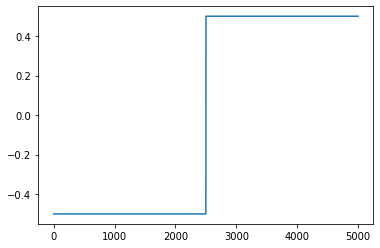

In [22]:
plt.plot(n)

In [23]:
xi=1/n -1

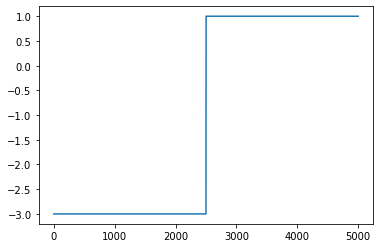

In [24]:
plt.plot(xi)
plt.savefig("log_arg.png")

$$\log(-x)=log(x) + log(-1)= log(x) + i\pi$$

In [60]:
np.where(xi < 0)

(array([   0,    1,    2, ..., 2498, 2499, 2500]),)

In [57]:
np.sum((xi)[np.where(xi < 0)[0]])

-7503.0

In [58]:
np.sum((xi)[np.where(xi > 0)[0]])

2500.00000000002

In [26]:
np.unique(xi)

array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.])

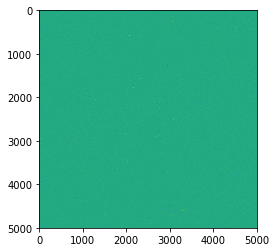

In [61]:
plt.imshow(A_1)

In [17]:
np.log(-3+0.0*1.j)

(1.0986122886681098+3.141592653589793j)

1.0986122886681098

In [31]:
xi = np.array(xi,dtype=np.complex128)

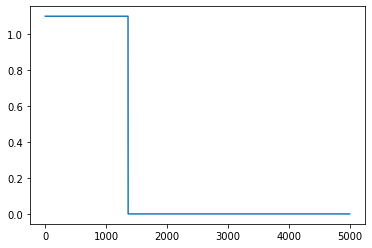

In [32]:
plt.plot(np.log(xi).real)

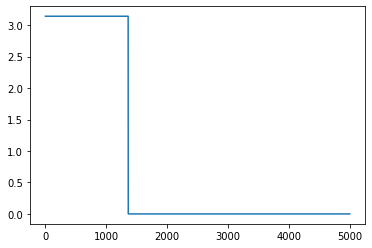

In [48]:
plt.plot(np.log(xi).imag)

In [67]:
np.log(np.array(xi,dtype=np.complex128))

array([1.09861229+3.14159265j, 1.09861229+3.14159265j,
       1.09861229+3.14159265j, ..., 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])

In [68]:
bruno=A_1@np.diag(np.log(np.array(xi,dtype=np.complex128)))@A_2

In [69]:
bros=B_1@np.diag(np.log(np.array(xi,dtype=np.complex128)))@B_2

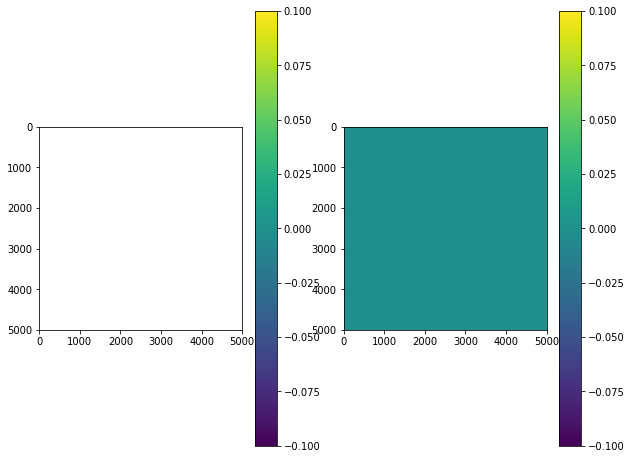

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(bruno.real)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(bruno.imag)
plt.colorbar()

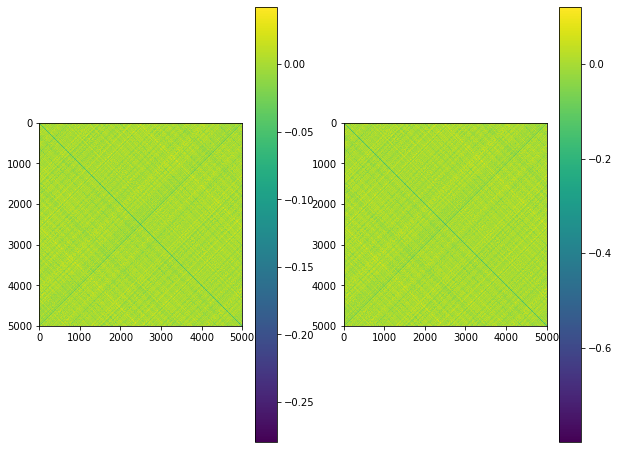

In [45]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(bros.real)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(bros.imag)
plt.colorbar()